# Final Project
Annika Veneracion

# 1. Business Understanding

# 2. Data Understanding

## 2.1: Collect Initial Data

In [221]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from matplotlib import pyplot
from numpy import asarray
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import csv
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import accuracy_score

In [222]:
df2 = pd.read_csv("oasis_longitudinal.csv")

df2

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


## 2.2 Describe Data

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [224]:
df2.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [225]:
df2.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## 2.3 Explore Data

<AxesSubplot:xlabel='Group', ylabel='count'>

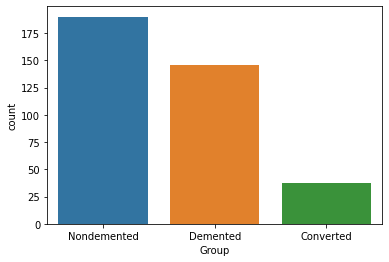

In [226]:
# converted = was previously nondemented but was diagnosed after their visit
sns.countplot(x = 'Group' ,  data = df2)

<AxesSubplot:xlabel='M/F', ylabel='count'>

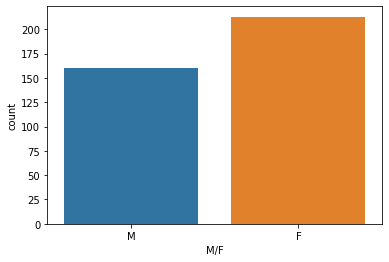

In [227]:
sns.countplot(x = 'M/F' ,  data = df2)

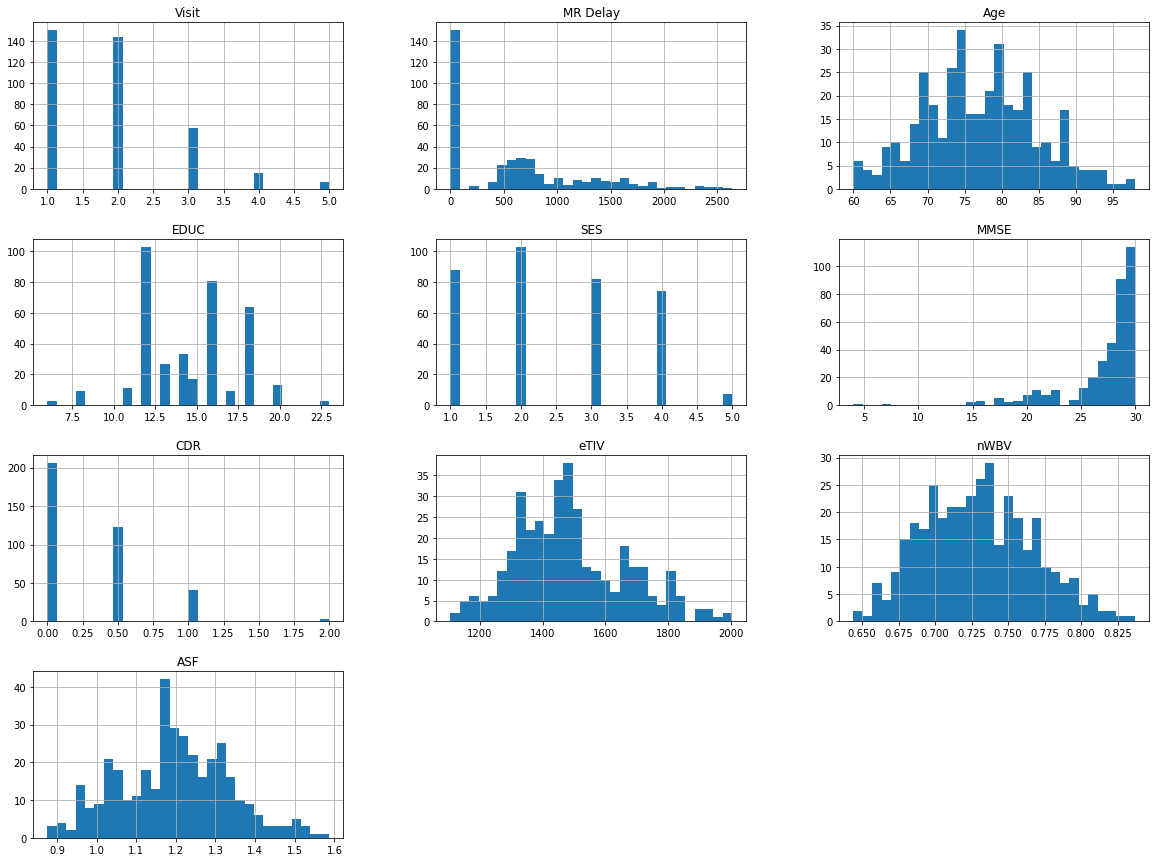

In [228]:
df2.hist(bins=30, figsize=(20,15))
plt.show()

##### First findings
>More females than males 

>Majority of ages fall under 70’s

>Majority are from second SES

>Majority from second level of education for cross-sectional data

>Majority have had less than 12.5 years of education

>There is an extra group called “converted”, wherein they were first nondemented but turned out to be demented after a later visit

>Majority of patients had visited once only

>MMSE values are skewed to the right (around 30), which means that majority of patients have normal cognition

>CDR is mostly 0-0.5 (no dementia)

>eTIV is about 1450-1500

>Highest nWBV is at around 0.73 to 0.74

>Highest ASF is about 1.5 to 1.7


## 2.4 Verify Data Quality

##### Data Quality Verification
> There are some missing values, so imputation of data needs to be done

> There is a mix of categorical variables and numerical variables. One hot encoding should be done to make all data numerical

# 3 Data Preparation

## 3.1 Select Data

Drop unnecessary data features for modeling (those with unique values and those unrelated to Alzheimer's disease (e.g. visits)

In [229]:
df2 = df2.drop(columns=['Subject ID','MRI ID','Visit','MR Delay', 'Hand'])

In [230]:
df2

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


## 3.2 Clean Data

In [231]:
df2.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

Since there are missing values, impute using Mode Imputation

In [232]:
df2['SES'].groupby(df2['SES']).count()
# to find the mode, find the most frequent value

SES
1.0     88
2.0    103
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [233]:
df2['SES'].fillna(2.0, inplace=True) #used Mode imputation since it is a categorical variable
df2['MMSE'].fillna(df2['MMSE'].median(), inplace=True) #used Mean imputation since it is a numerical variable

df2.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


## 3.3 Construct Data

Convert categorical data to numerical

In [235]:
df2['M/F'] = [1 if each == "M" else 0 for each in df2['M/F']]
df2['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in df2['Group']]
df2 = df2.rename(columns={'EDUC':'Educ'})

In [236]:
data = df2
data

,Group,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   Educ    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB


In [238]:
data.describe()

,Group,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,0.428954,77.013405,14.597855,2.436997,27.351206,0.290885,1488.128686,0.729568,1.195461
std,0.500583,0.495592,7.640957,2.876339,1.109307,3.675329,0.374557,176.139286,0.037135,0.138092
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,1.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [239]:
data.isnull().sum()

Group    0
M/F      0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

##### Exploratory Data Analysis

In [240]:
corr = data.corr()

corr

,Group,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.222146,-0.005941,-0.193060,0.038870,-0.520553,0.778049,-0.042700,-0.311346,0.032495
M/F,0.222146,1.000000,-0.037726,0.089279,-0.048504,-0.168530,0.202140,0.572549,-0.249618,-0.561647
Age,-0.005941,-0.037726,1.000000,-0.027886,-0.045410,0.055255,-0.026257,0.042348,-0.518359,-0.035067
Educ,-0.193060,0.089279,-0.027886,1.000000,-0.691222,0.192158,-0.153121,0.257015,-0.012200,-0.241752
SES,0.038870,-0.048504,-0.045410,-0.691222,1.000000,-0.139943,0.052313,-0.249030,0.092361,0.240831
MMSE,-0.520553,-0.168530,0.055255,0.192158,-0.139943,1.000000,-0.674876,-0.036234,0.342189,0.044960
CDR,0.778049,0.202140,-0.026257,-0.153121,0.052313,-0.674876,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.042700,0.572549,0.042348,0.257015,-0.249030,-0.036234,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.311346,-0.249618,-0.518359,-0.012200,0.092361,0.342189,-0.344819,-0.210122,1.000000,0.213476
ASF,0.032495,-0.561647,-0.035067,-0.241752,0.240831,0.044960,-0.029340,-0.988877,0.213476,1.000000


<AxesSubplot:>

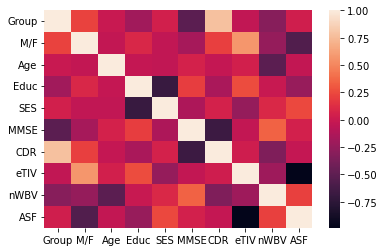

In [241]:
sns.heatmap(corr)

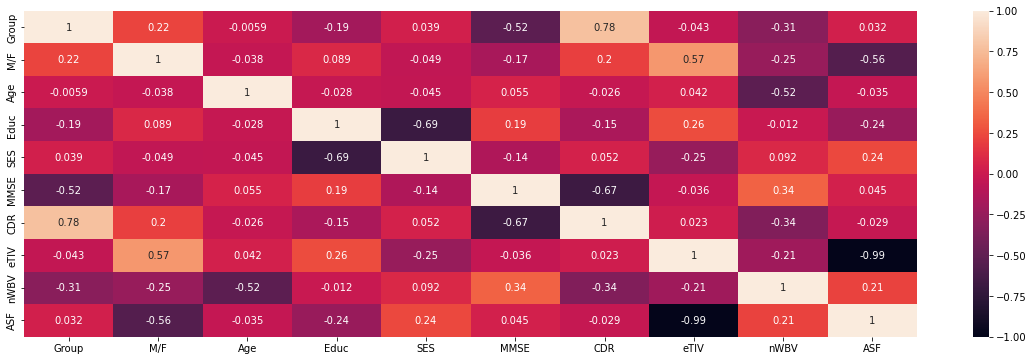

In [242]:
plt.figure(figsize=(20, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

Correlation between males and dementia is high (0.210282). Correlation between MMSE and nWBV is also high (0.322025). There is a positive correlation between nWBV and ASF (0.190626). There also seems to be a correlation between education level and eTIV (0.236263) and MMSE (0.216439). SES also has a correlation with ASF (0.224730).

               0   1
Demented      84  99
Nondemented  129  61


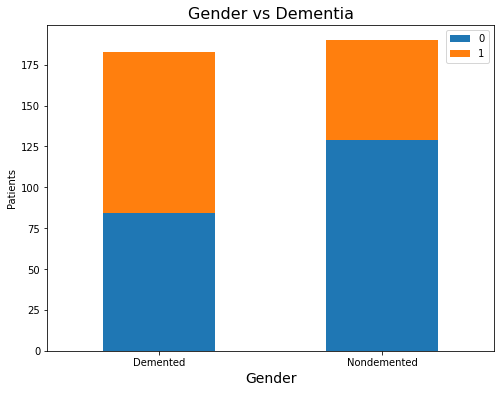

In [243]:
data_demented = data[data['Group']==1]['M/F'].value_counts()
data_nondemented = data[data['Group']==0]['M/F'].value_counts()
data_gender = pd.DataFrame([data_demented, data_nondemented])
data_gender.index=['Demented','Nondemented']
data_gender.plot(kind='bar', figsize=(8,6), stacked=True)
print(data_gender)

#0 = Female, 1 = Male

plt.title('Gender vs Dementia', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.show()

3.0562325974645677
Number of Bins: 33


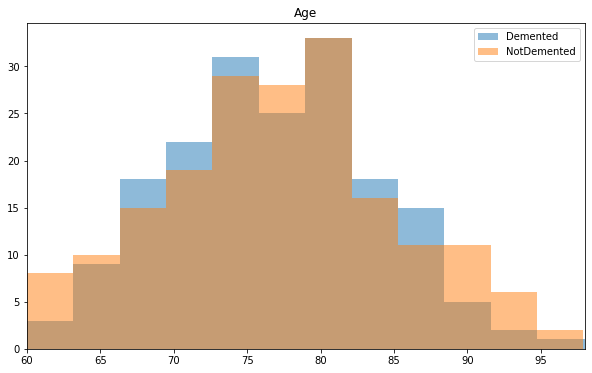

In [244]:
plt.figure(figsize=(10,6))
def freedman_diaconis(vals):
    return 2 * (iqr(vals) / (len(vals) ** (1./3)))

data_D = data[data['Group'] == 1]
data_notD = data[data['Group'] == 0]

bin_width = freedman_diaconis(data['Age'].values)
print(bin_width)

num_bins = int((np.amax(data['Age'].values) + bin_width) / bin_width)
print("Number of Bins: {}".format(num_bins))

bins = np.linspace(0, np.amax(data['Age']) + bin_width, num_bins)

pyplot.hist(data_D['Age'].values, bins, alpha=0.5, label='Demented')
pyplot.hist(data_notD['Age'].values, bins, alpha=0.5, label='NotDemented')
plt.xlim(data['Age'].min(), data['Age'].max())

pyplot.legend(loc='upper right')
plt.title('Age')

pyplot.show()

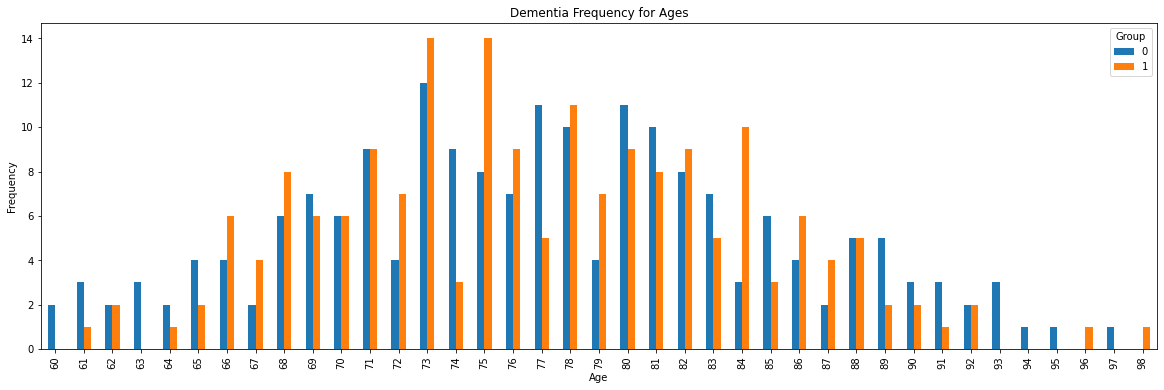

In [311]:
pd.crosstab(data.Age,data.Group).plot(kind="bar",figsize=(20,6))
plt.title('Dementia Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 0 - nondemented, 1 = demented

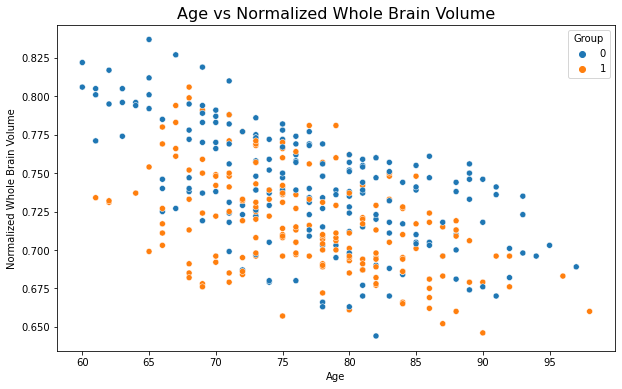

In [245]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='nWBV', data=data, hue='Group')
plt.title('Age vs Normalized Whole Brain Volume', size=16)
plt.xlabel('Age')
plt.ylabel('Normalized Whole Brain Volume')
plt.show()

# 0 - nondemented, 1 = demented

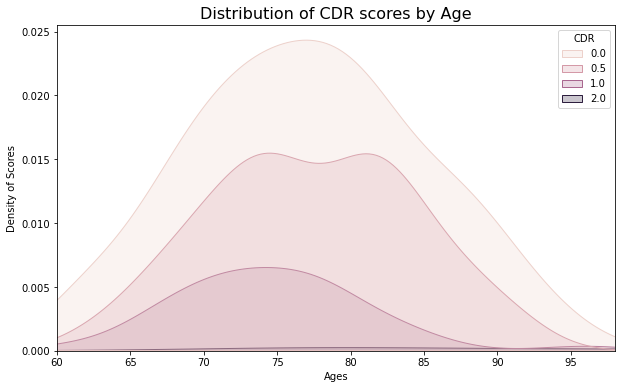

In [246]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Age', shade=True, hue='CDR', data=data)
plt.title('Distribution of CDR scores by Age', size=16)
plt.xlim(data['Age'].min(), data['Age'].max())
plt.xlabel('Ages')
plt.ylabel('Density of Scores')
plt.show()

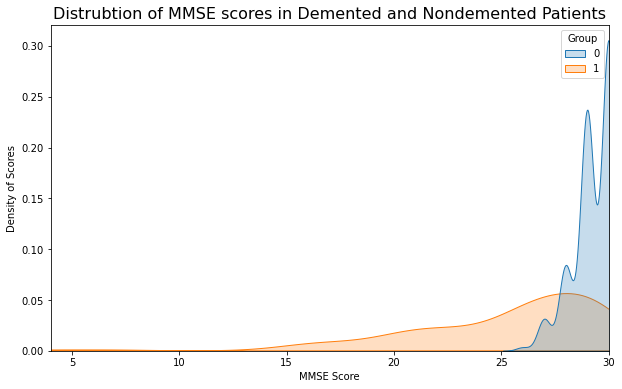

In [247]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='MMSE', shade=True, hue='Group', data=data)
plt.title('Distrubtion of MMSE scores in Demented and Nondemented Patients', size=16)
plt.xlim(data['MMSE'].min(), data['MMSE'].max())
plt.xlabel('MMSE Score')
plt.ylabel('Density of Scores')
plt.show()

# 0 = nondemented, 1 = demented

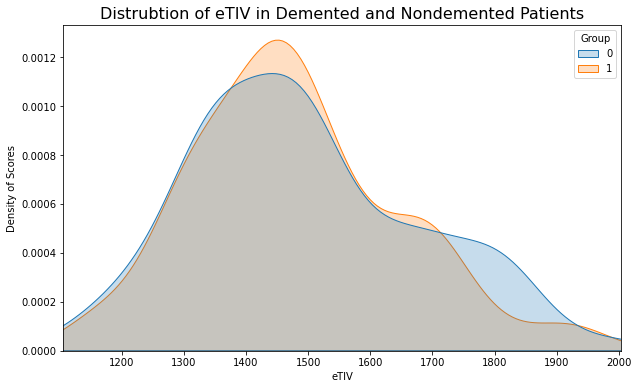

In [248]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='eTIV', shade=True, hue='Group', data=data)
plt.title('Distrubtion of eTIV in Demented and Nondemented Patients', size=16)
plt.xlim(data['eTIV'].min(), data['eTIV'].max())
plt.xlabel('eTIV')
plt.ylabel('Density of Scores')
plt.show()

# 0 = nondemented, 1 = demented

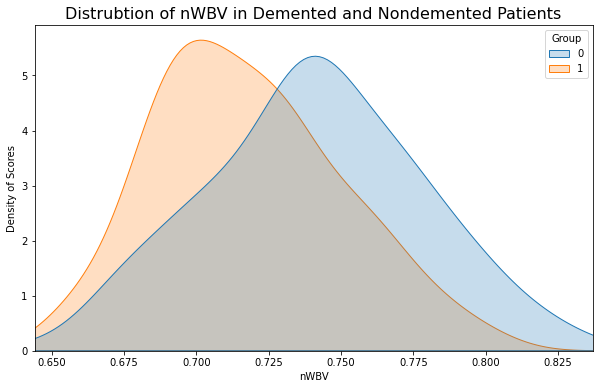

In [249]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='nWBV', shade=True, hue='Group', data=data)
plt.title('Distrubtion of nWBV in Demented and Nondemented Patients', size=16)
plt.xlim(data['nWBV'].min(), data['nWBV'].max())
plt.xlabel('nWBV')
plt.ylabel('Density of Scores')
plt.show()

# 0 = nondemented, 1 = demented

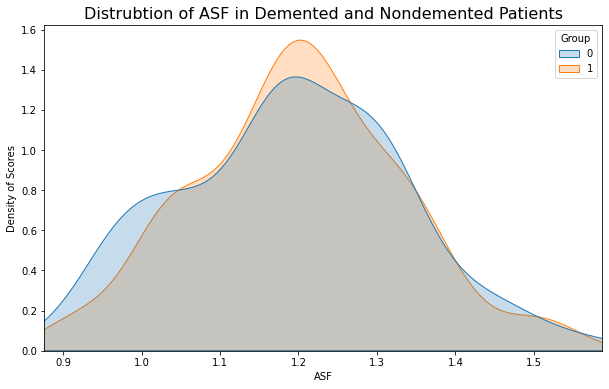

In [250]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='ASF', shade=True, hue='Group', data=data)
plt.title('Distrubtion of ASF in Demented and Nondemented Patients', size=16)
plt.xlim(data['ASF'].min(), data['ASF'].max())
plt.xlabel('ASF')
plt.ylabel('Density of Scores')
plt.show()

# 0 = nondemented, 1 = demented

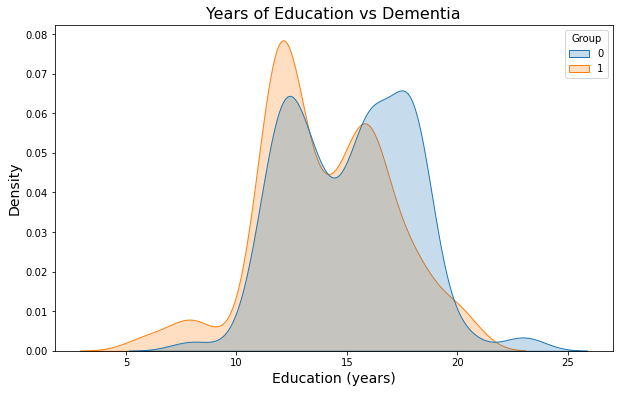

In [251]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Educ', shade=True, hue='Group', data=data)
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

# 0 = nondemented, 1 = demented

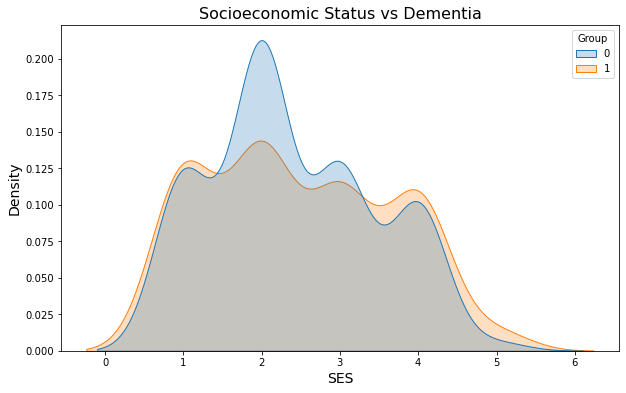

In [252]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='SES', shade=True, hue='Group', data=data)
plt.title('Socioeconomic Status vs Dementia', size=16)
plt.xlabel('SES', size=14)
plt.ylabel('Density', size=14)
plt.show()

# 0 = nondemented, 1 = demented

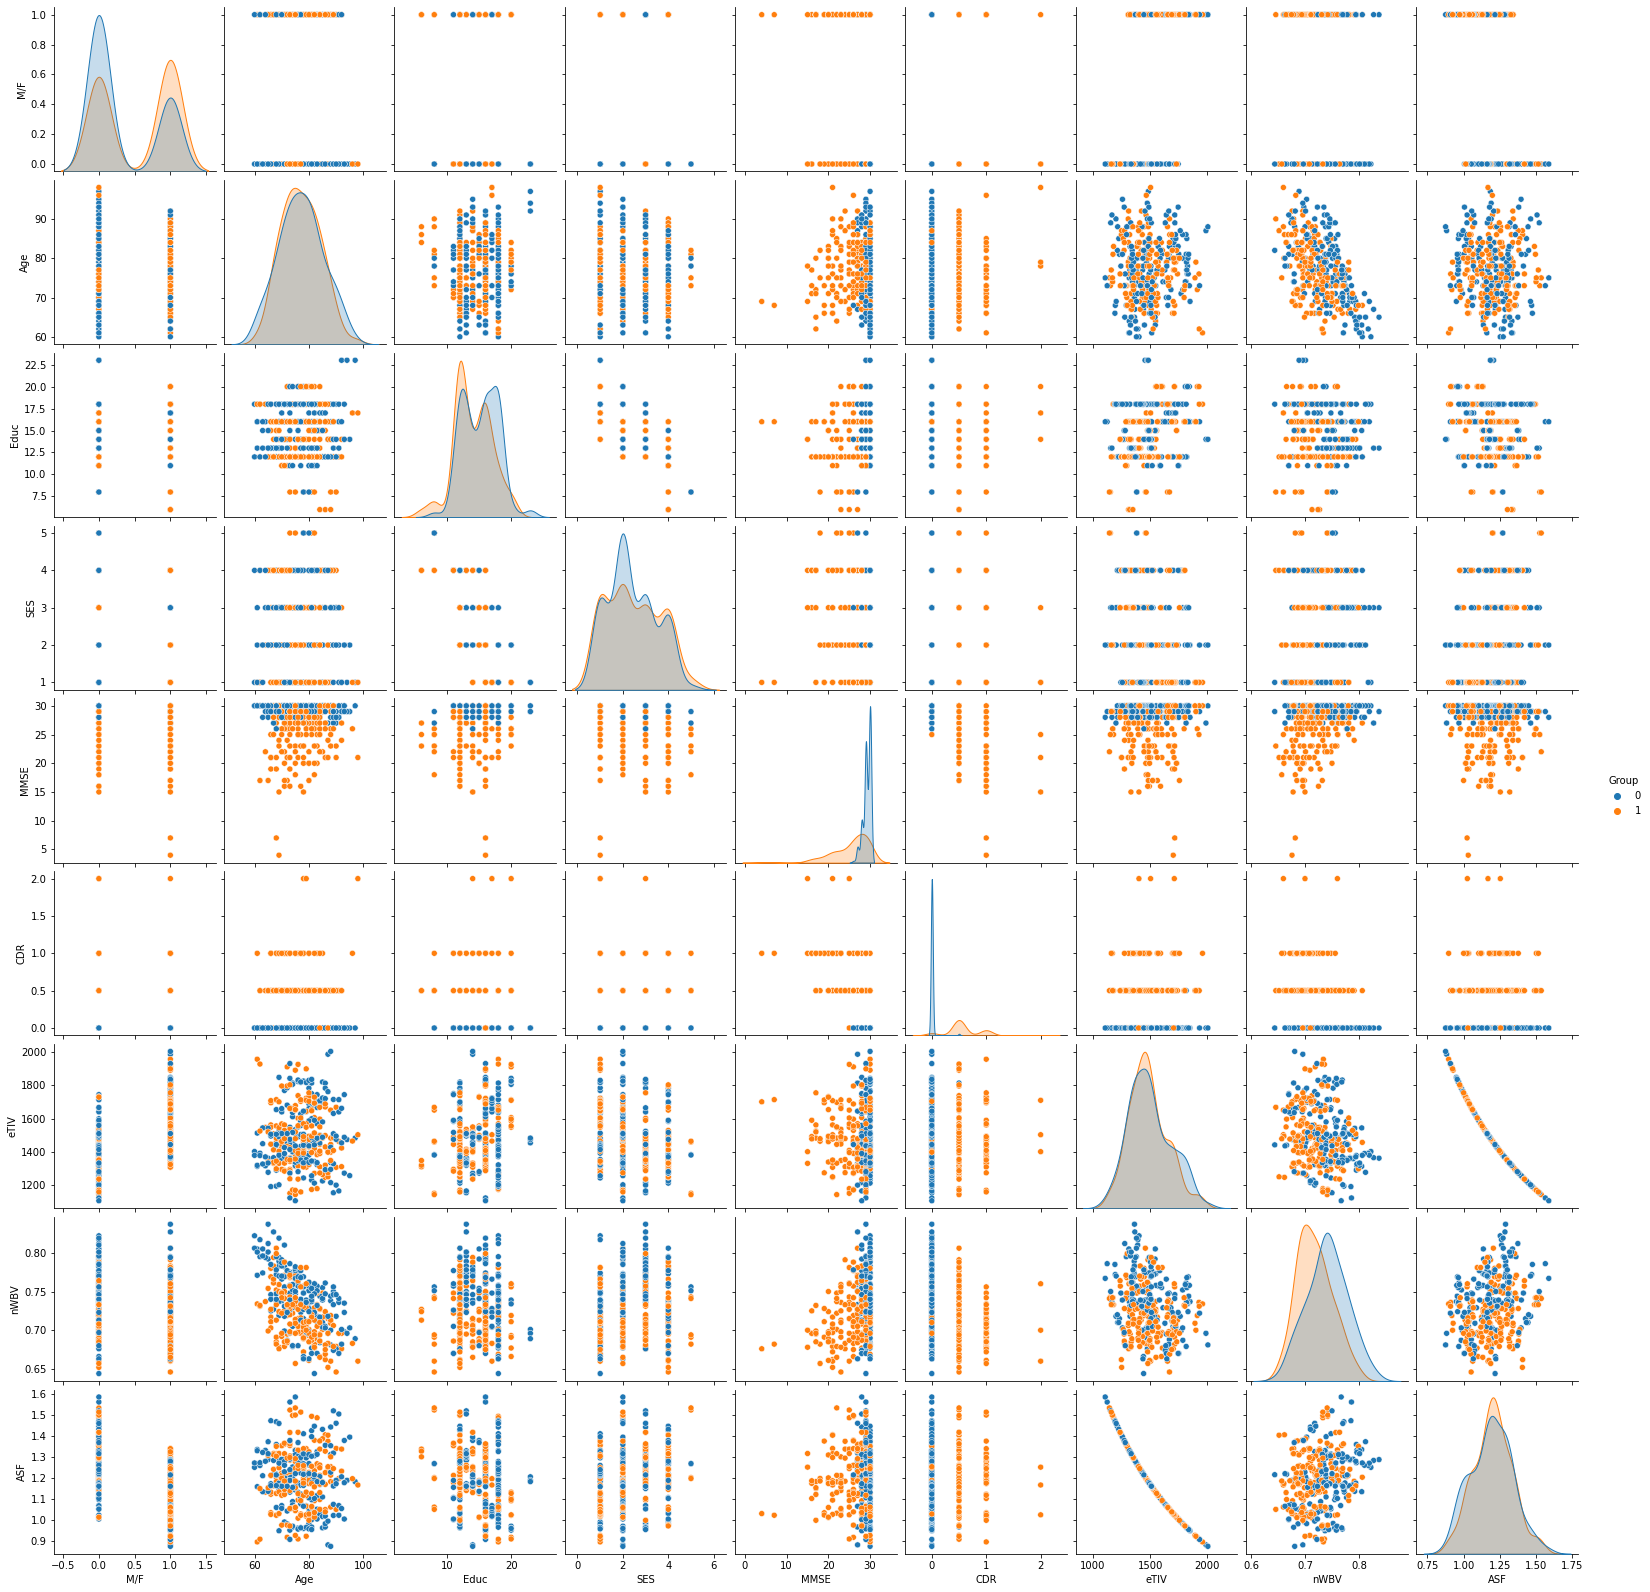

In [253]:
sns.pairplot(data, hue='Group', height=2.5);

#### EDA Conclusions
> In the dataset, there is a higher rate of dementia in males than females. Dementia is more prevalent in patients aged 70-80, whereas non-demented patients are typically younger (around 60).

> Based on the correlation heatmap and scatterplot, there is a negative correlation between nWBV and age.

> Majority of patients have 0 to 0.5 CDR scores, meaning they have normal to very mild dementia.

> MMSE scores seem to be higher for nondemented patients than those with dementia. The MMSE scores for dementia patients seem to be more scattered (16-30), while those with no dementia only ranged from 26-30. Any MMSE score greater than or equal to 24 points indicates a normal cognition, hence why those without dementia have higher scores. MMSE scores for demented patients ranges from moderate (10–18 points) to mild (19–23 points) cognitive impairment.

> eTIV in dementia patients is more prominent in the 1300-1600 range than in non dementia patients. However, both demented and nondemented patients fall within the same range of eTIV. eTIV is also more scattered in non dementia patients. It can also be seen that eTIV and ASF falls linearly, showing that eTIV and ASF are negatively correlated. This is because ASF is the volume-scaling factor necessary to fit each individual, and should be proportionate to eTIV.

> nWBV in dementia patients is lower than that in non dementia patients. Dementia patients have nWBV typically falling within 0.70 - 0.76, while that of non dementia patients falls within 0.72 - 0.78. Hence, subjects with lesser nWBV value are more likely to be demented.

> ASF is less spread out for demented patients (ranges from 1.1 to 1.4) than for nondemented patients. Results are similar to eTIV since these are negatively correlated on a 1-1 basis.

> Years of education for those with dementia is less compared to those without dementia. This aligns with findings suggesting that less education relates with higher probability of dementia.

> SES of those with dementia is more spread out. This may mean that the SES of a patient does not increase the probability of having dementia.


## 3.4 Integrate Data
No data to merge

## 3.5 Format Data


<BarContainer object of 4 artists>

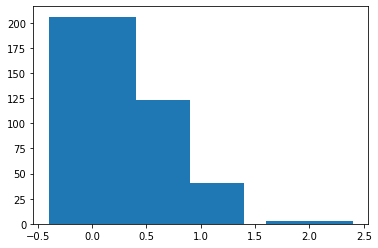

In [254]:
plt.bar(data['CDR'].unique(),data['CDR'].value_counts())

In [255]:
data['CDR'].groupby(data['CDR']).count()

CDR
0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

##### CDR Value Meaning:

> 0 - Normal

> 0.5 - Very Mild Dementia

> 1 - Mild Dementia

> 2 - Moderate Dementia

> 3 - Severe Dementia

# 4 Data Modeling

## 4.1 Select Modeling Technique

Different modeling techniques will be explored to see which gives the best scores. Since we are trying to classify based on the labelled input for CDR, Supervised Learning methods will be used for prediction

In [264]:
y = data['Group'].values
x = data[['CDR','M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

## 4.2 Generate Test Design

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1,test_size=0.2)

In [267]:
df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
1    151
0    147
Name: 0, dtype: int64

In Testing Split:
0    43
1    32
Name: 0, dtype: int64


In [268]:
# Normalizing the data since different columns have different ranges of values

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

x_train

array([[ 0.50704107,  1.16836611, -0.92004547, ...,  1.74994068,
         0.31738521, -1.58285021],
       [ 1.8209388 ,  1.16836611,  0.38741066, ...,  0.03687071,
        -1.86711558, -0.15206517],
       [ 0.50704107,  1.16836611,  1.43337556, ...,  0.9274402 ,
        -1.89408472, -0.96139812],
       ...,
       [ 0.50704107,  1.16836611,  0.64890188, ..., -0.05956038,
        -0.03321368, -0.05812473],
       [ 0.50704107, -0.8558961 , -0.52780863, ...,  0.27511223,
        -0.14109026, -0.39052934],
       [ 0.50704107,  1.16836611,  0.64890188, ...,  0.67218143,
        -1.43560925, -0.74461251]])

## 4.3 Build Model

#### XGBClassifier

In [269]:
FOLDS = 5

parameters = {
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "n_estimators":range(1,1000)
    }

model_xgb = XGBClassifier()

# hyperparameter tuning using RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = parameters, n_iter = 100, cv = FOLDS, 
                               verbose=0, random_state=1,n_jobs = -1, scoring='accuracy')
xgb_random.fit(x_train, y_train)

xgb_random.best_params_

{'n_estimators': 150, 'max_depth': 50, 'learning_rate': 0.075}

In [270]:
model_xgb = xgb_random.best_estimator_
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9066666666666666

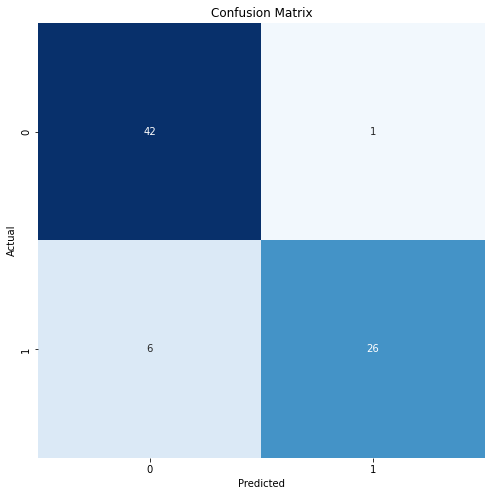

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.96      0.81      0.88        32

    accuracy                           0.91        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.91      0.91      0.91        75



In [271]:
y_pred = model_xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

#### GradientBoostingClassifier

In [272]:
FOLDS = 10

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

model_gbc = GradientBoostingClassifier()


gbc_random = RandomizedSearchCV(estimator = model_gbc, param_distributions = parameters, n_iter = 100, cv = FOLDS, 
                               verbose=0, random_state=1,n_jobs = -1, scoring='accuracy')
gbc_random.fit(x_train, y_train)

gbc_random.best_params_

{'subsample': 0.8,
 'n_estimators': 66,
 'min_samples_split': 0.15,
 'min_samples_leaf': 40,
 'max_features': 'sqrt',
 'max_depth': 25,
 'loss': 'deviance',
 'learning_rate': 0.5,
 'criterion': 'friedman_mse'}

In [273]:
model_gbc = gbc_random.best_estimator_
model_gbc.fit(x_train,y_train)
model_gbc.score(x_test,y_test)

0.9066666666666666

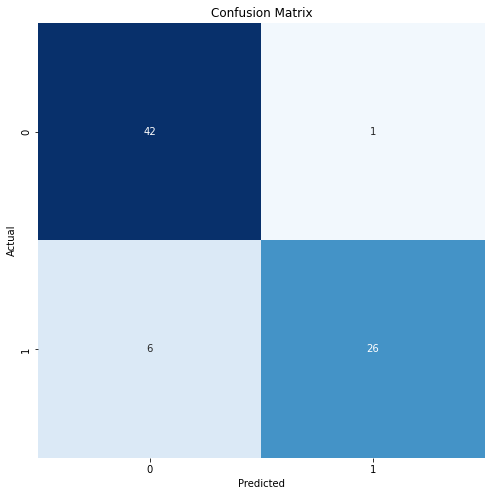

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.96      0.81      0.88        32

    accuracy                           0.91        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.91      0.91      0.91        75



In [274]:
y_pred = model_gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### RandomForestClassifier

In [275]:
FOLDS = 5

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = range(1,10)

# measure the quality of a split
criterion = ['gini']

# Method of selecting samples for training each tree
bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

model_rfc = RandomForestClassifier()


rfc_random = RandomizedSearchCV(estimator = model_rfc, param_distributions = parameters, n_iter = 100, cv = FOLDS, 
                               verbose=0, random_state=1,n_jobs = -1, scoring='accuracy')
rfc_random.fit(x_train, y_train)

rfc_random.best_params_

{'n_estimators': 60,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini',
 'bootstrap': True}

In [276]:
model_rfc = rfc_random.best_estimator_
model_rfc.fit(x_train,y_train)
model_rfc.score(x_test,y_test)

0.92

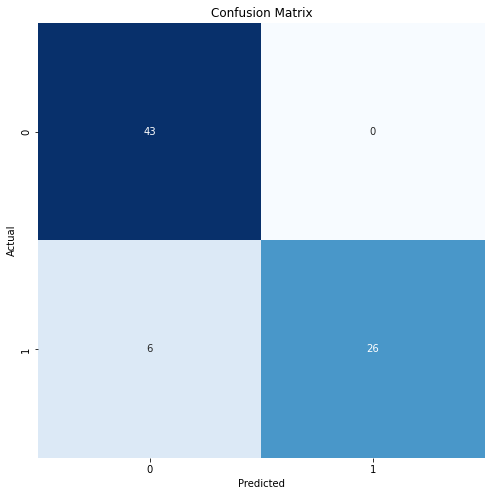

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [277]:
y_pred = model_rfc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### LogisticRegression

In [278]:
FOLDS = 5

parameters = {'penalty': ['l2'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'C': [0.001,0.01,0.1,1, 2, 3, 5, 10,100,1000]}

model_lr = LogisticRegression(max_iter=1000)


lr_random = RandomizedSearchCV(estimator = model_lr, param_distributions = parameters, cv = FOLDS, 
                               verbose=0,random_state=1,n_jobs = -1, scoring='accuracy')
lr_random.fit(x_train, y_train)

lr_random.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 3}

In [279]:
model_lr = lr_random.best_estimator_
model_lr.fit(x_train,y_train)
model_lr.score(x_test,y_test)

0.92

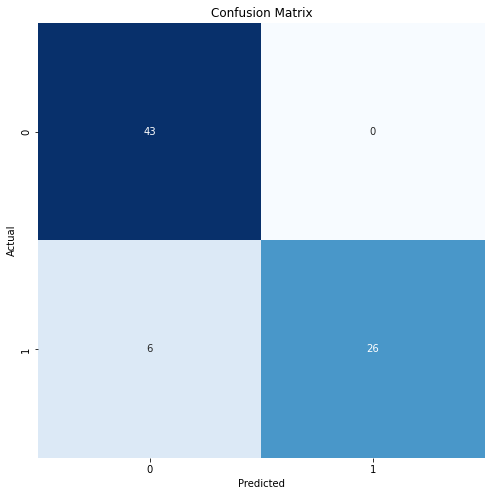

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [280]:
y_pred = model_lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### DecisionTree

In [281]:
FOLDS = 5

parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1,10)}

model_dtc = DecisionTreeClassifier()


dtc_random = RandomizedSearchCV(estimator = model_dtc, param_distributions = parameters,n_iter = 15, cv = FOLDS, 
                               verbose=0,random_state=1, n_jobs = -1, scoring='accuracy')
dtc_random.fit(x_train, y_train)

dtc_random.best_params_

{'max_depth': 2, 'criterion': 'entropy'}

In [282]:
model_dtc = dtc_random.best_estimator_
model_dtc.fit(x_train,y_train)
model_dtc.score(x_test,y_test)

0.92

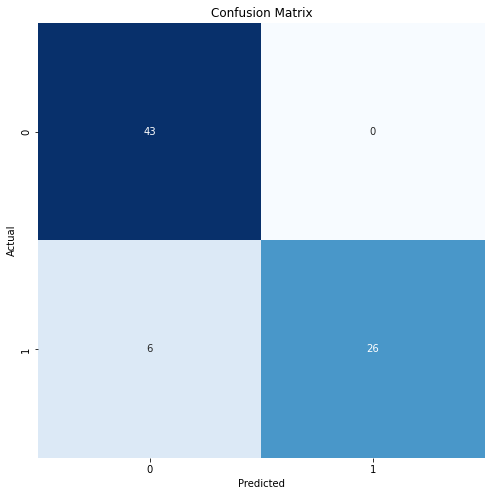

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [283]:
y_pred = model_dtc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### KNClassifier

In [284]:
FOLDS = 5

parameters = {'n_neighbors': range(1,10), 
              'p': [1,2]}

model_knn = KNeighborsClassifier()


knn_random = RandomizedSearchCV(estimator = model_knn, param_distributions = parameters,n_iter = 10, cv = FOLDS, 
                               verbose=0,random_state=1, n_jobs = -1, scoring='accuracy')
knn_random.fit(x_train, y_train)

knn_random.best_params_

{'p': 2, 'n_neighbors': 1}

In [285]:
model_knn = knn_random.best_estimator_
model_knn.fit(x_train,y_train)
model_knn.score(x_test,y_test)

0.8933333333333333

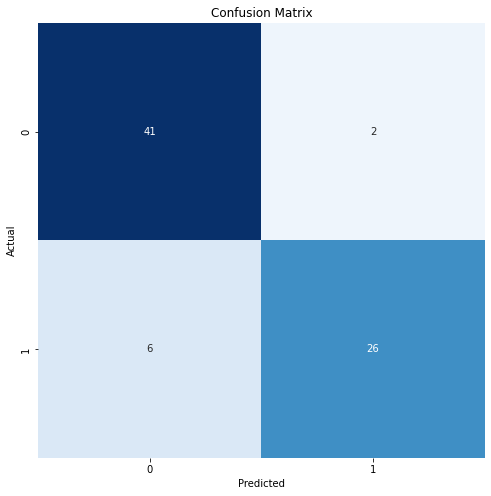

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.93      0.81      0.87        32

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75



In [286]:
y_pred = model_knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### MLPClassifier

In [287]:
FOLDS = 5

parameters = {'hidden_layer_sizes': range(1,200), 
              'activation':['identity', 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam']}

model_mlp = MLPClassifier(max_iter=15000, batch_size = 20)


mlp_random = RandomizedSearchCV(estimator = model_mlp, param_distributions = parameters,n_iter = 100, cv = FOLDS, 
                               verbose=0,random_state=1, n_jobs = -1, scoring='accuracy')
mlp_random.fit(x_train, y_train)

mlp_random.best_params_

{'solver': 'adam', 'hidden_layer_sizes': 108, 'activation': 'tanh'}

In [288]:
model_mlp = mlp_random.best_estimator_
model_mlp.fit(x_train,y_train)
model_mlp.score(x_test,y_test)

0.9333333333333333

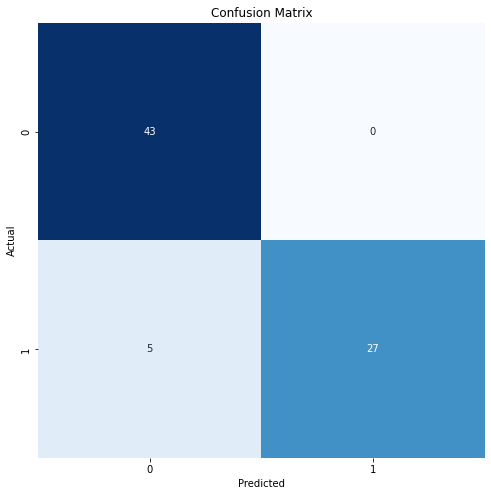

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.84      0.92        32

    accuracy                           0.93        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.94      0.93      0.93        75



In [289]:
y_pred = model_mlp.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### SVC

In [290]:
FOLDS = 5

parameters = {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

model_svc = SVC()


svc_random = RandomizedSearchCV(estimator = model_svc, param_distributions = parameters,n_iter = 100, cv = FOLDS, 
                               verbose=0,random_state=1, n_jobs = -1, scoring='accuracy')
svc_random.fit(x_train, y_train)

svc_random.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 8}

In [291]:
model_svc = svc_random.best_estimator_
model_svc.fit(x_train,y_train)
model_svc.score(x_test,y_test)

0.92

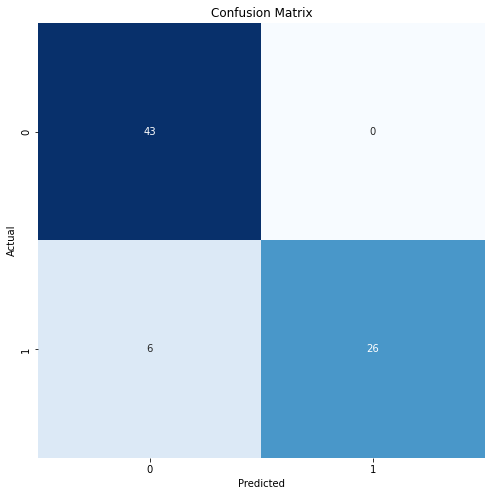

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [292]:
y_pred = model_svc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### ExtraTreesClassifier

In [293]:
FOLDS = 5

parameters = {
    'criterion':['gini', 'entropy']}
model_etc = ExtraTreeClassifier(splitter = 'best')


etc_random = RandomizedSearchCV(estimator = model_etc, param_distributions = parameters,n_iter = 2, cv = FOLDS, 
                               verbose=0,random_state=1, n_jobs = -1, scoring='accuracy')
etc_random.fit(x_train, y_train)

etc_random.best_params_

{'criterion': 'entropy'}

In [294]:
model_etc = etc_random.best_estimator_
model_etc.fit(x_train,y_train)
model_etc.score(x_test,y_test)

0.9066666666666666

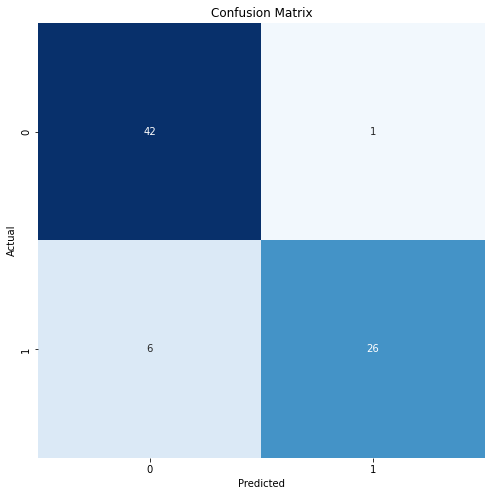

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.96      0.81      0.88        32

    accuracy                           0.91        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.91      0.91      0.91        75



In [295]:
y_pred = model_etc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

In [302]:
model_gnb = GaussianNB()


gnb_random = model_gnb
gnb_random.fit(x_train, y_train)

GaussianNB()

In [303]:
model_gnb = gnb_random
model_gnb.fit(x_train,y_train)
model_gnb.score(x_test,y_test)

0.92

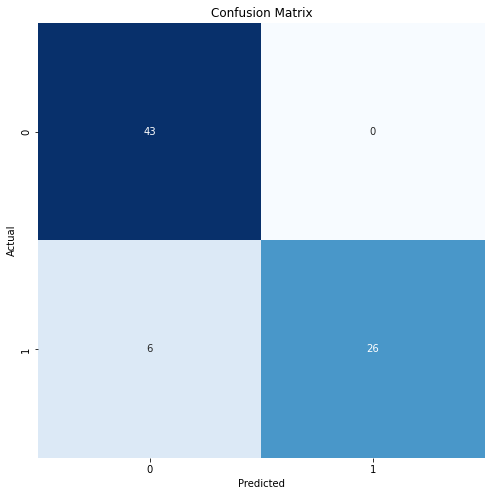

Classification Report:
-------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.90        32

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



In [304]:
y_pred = model_gnb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------------------------------------\n", clr)

### K-Means Clustering

We want to observe the patterns or groups based on those who have dementia and those who don't

In [78]:
data_dementia = data[data['Group'] == 1].iloc[:,1:]

data_dementia

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
2,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
10,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
11,1,73,16,2.0,27.0,1.0,1365,0.727,1.286
...,...,...,...,...,...,...,...,...,...
365,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
366,0,73,16,3.0,21.0,1.0,1351,0.708,1.299
367,1,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,1,82,16,1.0,28.0,0.5,1693,0.694,1.037


In [79]:
x = data_dementia.values

In [81]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
  
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [82]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 5074267.909408108
2 : 1781544.009326905
3 : 830646.5022802801
4 : 538208.6080592438
5 : 359155.8816292244
6 : 226940.4314886105
7 : 153765.88829659316
8 : 121683.86997571903
9 : 91979.31767122257


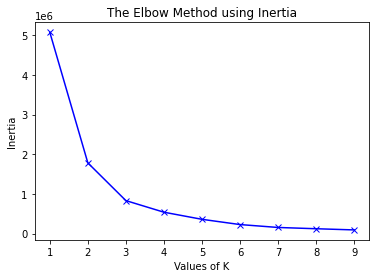

In [83]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [80]:
#using 3 clusters since this is the "elbow" of the graph, or where it starts to plateau

kmeanModel = KMeans(n_clusters=7)
kmeanModel.fit(x)

KMeans(n_clusters=7)

In [81]:
#predict the labels of clusters.
label = kmeanModel.fit_predict(x)
 
print(label)

[1 1 1 0 6 6 2 2 2 2 5 5 1 1 6 6 6 5 5 5 4 4 0 0 6 2 5 5 6 2 2 0 0 2 2 2 2
 3 3 0 0 0 0 0 0 2 2 0 0 0 2 2 1 1 1 1 1 2 2 0 0 0 0 0 6 6 6 2 2 2 2 4 4 6
 6 3 3 2 2 2 5 5 5 0 0 2 2 2 2 6 6 6 6 2 6 2 2 2 2 2 6 6 6 5 5 2 2 5 5 5 5
 0 0 5 5 0 0 6 6 2 5 6 6 2 2 1 1 1 1 1 0 0 2 2 0 0 1 1 0 0 6 6 6 1 1 0 0 1
 1 0 0 0 2 3 3 5 5 2 5 1 1 2 1 4 4 4 4 4 6 6 6 5 5 3 3 3 1 1 0 0 1 1 1]


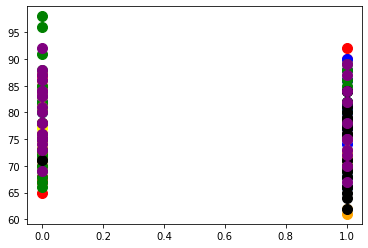

In [82]:
plt.scatter(x[label==0, 0], x[label==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[label==1, 0], x[label==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[label==2, 0], x[label==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[label==3, 0], x[label==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.scatter(x[label==4, 0], x[label==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(x[label==5, 0], x[label==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(x[label==6, 0], x[label==6, 1], s=100, c='purple', label ='Cluster 7')



plt.show()

From this we can see that the clusters based on dementia are unclear. The clusters are grouped in either 0 (no dementia) or 1 (with dementia). 

## 4.4 Assess Model

> Based on the supervised classification models used, MLPClassifier had the highest accuracy at 0.9333333333333333. Multi-layer Perceptron classifier (MLP Classifier) is a type of neural network model that maps sets of input data onto a set of appropriate outputs. There are multiple layers and each layer is fully connected to the following one. The simplest MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

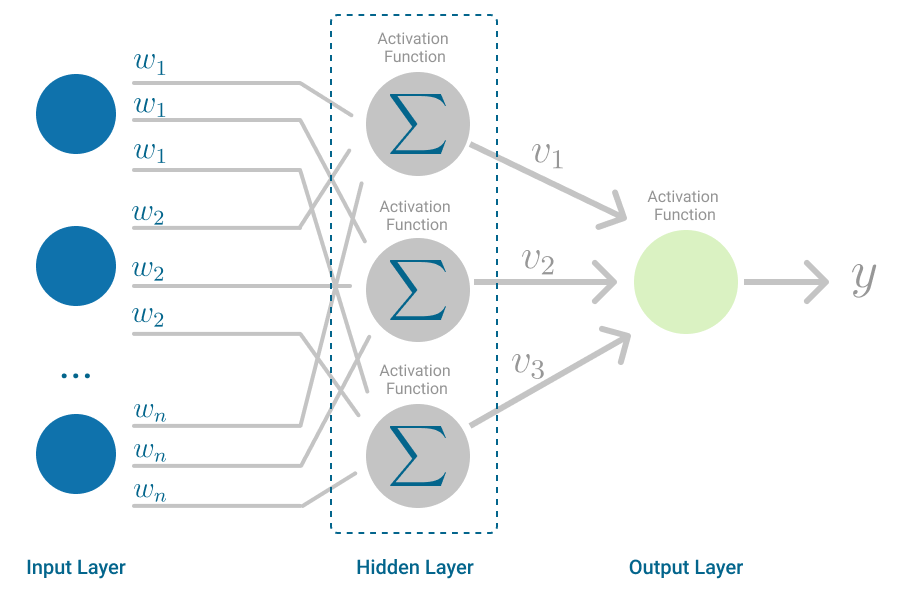


> Parameters:
>> hidden_layer_sizes : sets the number of layers and the number of nodes in the MLPClassifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple.

>> max_iter: It denotes the number of epochs or iterations to be done.

>> activation: The activation function for the hidden layers.

>> solver: specifies the algorithm for weight optimization across the nodes.

>> random_state: The parameter allows to set a seed for reproducing the same results

> In this activity, the model used the following parameters: {'solver': 'adam', 'hidden_layer_sizes': 108, 'activation': 'tanh'}
>> Solver adam : stochastic gradient-based optimizer that uses a log-loss function

>> activation tanh : uses the hyperbolic tan function f(x) = tanh(x)

In [77]:
print("Accuracies of Models: \n-------------------------------------------------------\n")

print("MLPClassifier: {}".format(model_mlp.score(x_test,y_test)))
print("RandomForestClassifier: {}".format(model_rfc.score(x_test,y_test)))
print("LogisticRegression: {}".format(model_lr.score(x_test,y_test)))
print("DecisionTreeClassifier: {}".format(model_dtc.score(x_test,y_test)))
print("GaussianNB: {}".format(model_gnb.score(x_test,y_test)))
print("SVC: {}".format(model_svc.score(x_test,y_test)))
print("XGBClassifier: {}".format(model_xgb.score(x_test,y_test)))
print("GradientBoostClassifier: {}".format(model_gbc.score(x_test,y_test)))
print("ExtraTreesClassifier: {}".format(model_etc.score(x_test,y_test)))
print("KNeighborsClassifier: {}".format(model_knn.score(x_test,y_test)))


Accuracies of Models: 
-------------------------------------------------------

MLPClassifier: 0.92
RandomForestClassifier: 0.92
LogisticRegression: 0.92
DecisionTreeClassifier: 0.92
GaussianNB: 0.92
SVC: 0.92
XGBClassifier: 0.9066666666666666
GradientBoostClassifier: 0.8933333333333333
ExtraTreesClassifier: 0.84
KNeighborsClassifier: 0.8933333333333333


# Evaluation

#### Conclusion
 
From this project, it was seen that all supervised learning models achieved accuracy above 70%. However, the MLPClassifier proved to have higher scores in accuracy, sensitivity, and f1 compared to others. This model can be used for deployment in the healthcare system to aid in faster diagnosis of dementia patients.

Through this process, the following steps were completed:
> Assessing the business situation in the healthcare industry in terms of diagnosis of Dementia

> Building the model that can be used for the CAD system

>Evaluation of model in terms of classification and prediction metrics

Other steps that need to be taken:
> Testing the model with new data (can use the other datasets from OASIS)

> Deploy final model in new CAD system

>Examine the performance of the model in real life and in relation to dementia patients to find the best possible treatment/s


#### Recommendations

For the data science aspect, one action to take is to deploy a model that can predict the CDR ratings of the patients. The dataset used lacked enough information on the CDR scores, hence why the Group (demented/nondemented) was used as a target variable. Another action is to try other classification and prediction models (since the predictive model focused on using sklearn libraries). One weakness of the MLP Classifier is that it had a longer training time than others. When scaling the model to a larger one, it may further delay the results and hence the diagnosis and treatment of the dementia patients. Another is to try the cross-sectional dataset from OASIS to check if results are the same and evaluate the performance of the model. 

For the business aspect, specifically the healthcare industry, a possible action to take after the finalization of the predictive model is to consult with other personnel (e.g. data analysts/ scientists, clinicians) for the possible implementation of this diagnostic tool in the healthcare setup. This is to find out the effectiveness and scalability of this model in a real world setting since the model was developed on a smaller scale (i.e. how do we incorporate this predictive model in diagnosis? Can the model be programmed in existing tools in the hospital for diagnosis, or does the hospital need new resources such as updated desktops to use this model?). 

Another action to take is to examine whether the hospital setup has the necessary resources for patients with dementia. Since the model showed the correlation among features such as gender, MMSE, and CDR scores with regards to the onset of dementia, one thing to consider is the availability of (new) treatments that can be done for these patients. This information is to be provided by health professionals, however. 

Another action to take is to scale the proposed model to accompany more datasets with more information. This, however, may need to be done by more researchers. Additionally, patient satisfaction ratings should be obtained to see whether the proposed CAD system is effective in improving the quality of care provided by the physicians with the help of this system.

Lastly, the costs and benefits of using the proposed CAD system should be discussed. At the present time, there is no available data in public with regards to the costs of using such a system (if any). This may depend on the setting of the hospital, availability of these technologies, and other important factors. Knowing these can help the hospital company decide what measures to take with regards to the use of the CAD system (i.e. will there need to be an increase in maintenance fees for this system?). 


## References
Data were provided by OASIS
> Daniel S. Marcus, Anthony F. Fotenos, John G. Csernansky, John C. Morris, Randy L. Buckner; Open Access Series of Imaging Studies: Longitudinal MRI Data in Nondemented and Demented Older Adults. J Cogn Neurosci 2010; 22 (12): 2677–2684. doi: https://doi.org/10.1162/jocn.2009.21407

Bento, C. (2021, September 30). Multilayer Perceptron explained with a real-life example and python code: Sentiment Analysis. Medium. Retrieved May 22, 2022, from https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

Brownlee, J. (2021, April 26). How to develop an extra trees ensemble with python. Machine Learning Mastery. Retrieved May 22, 2022, from https://machinelearningmastery.com/extra-trees-ensemble-with-python/

K-Nearest Neighbor(KNN) algorithm for Machine Learning - Javatpoint. www.javatpoint.com. (n.d.). Retrieved May 22, 2022, from https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

Machine learning random forest algorithm - javatpoint. www.javatpoint.com. (n.d.). Retrieved May 22, 2022, from https://www.javatpoint.com/machine-learning-random-forest-algorithm

Navlani, A. (2018, December 28). Python decision tree classification tutorial: Scikit-Learn Decisiontreeclassifier. DataCamp. Retrieved May 22, 2022, from https://www.datacamp.com/tutorial/decision-tree-classification-python

Nelson, D. (2019, August 8). Gradient boosting classifiers in python with scikit-learn. Stack Abuse. Retrieved May 22, 2022, from https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Ray, S. (2021, August 26). Learn naive Bayes algorithm: Naive Bayes classifier examples. Analytics Vidhya. Retrieved May 22, 2022, from https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ 

Dominguez J, Jiloca L, Fowler KC, De Guzman MF, Dominguez-Awao JK, Natividad B, Domingo J, Dominguez JD, Reandelar M Jr, Ligsay A, Yu JR, Aichele S, Phung TKT. Dementia Incidence, Burden and Cost of Care: A Filipino Community-Based Study. Front Public Health. 2021 May 14;9:628700. doi: 10.3389/fpubh.2021.628700. PMID: 34055712; PMCID: PMC8160123.

Buckner, R. L., Head, D., Parker, J., Fotenos, A. F., Marcus, D., Morris, J. C., & Snyder, A. Z. (2004). A unified approach for morphometric and functional data analysis in young, old, and demented adults using automated atlas-based head size normalization: reliability and validation against manual measurement of total intracranial volume. NeuroImage, 23(2), 724–738. https://doi.org/10.1016/j.neuroimage.2004.06.018

Sargolzaei, S., Sargolzaei, A., Cabrerizo, M., Chen, G., Goryawala, M., Noei, S., Zhou, Q., Duara, R., Barker, W., & Adjouadi, M. (2015). A practical guideline for intracranial volume estimation in patients with Alzheimer's disease. BMC bioinformatics, 16 Suppl 7(Suppl 7), S8. https://doi.org/10.1186/1471-2105-16-S7-S8

Bron, E. E., Smits, M., van der Flier, W. M., Vrenken, H., Barkhof, F., Scheltens, P., Papma, J. M., Steketee, R. M., Méndez Orellana, C., Meijboom, R., Pinto, M., Meireles, J. R., Garrett, C., Bastos-Leite, A. J., Abdulkadir, A., Ronneberger, O., Amoroso, N., Bellotti, R., Cárdenas-Peña, D., Álvarez-Meza, A. M., … Alzheimer's Disease Neuroimaging Initiative (2015). Standardized evaluation of algorithms for computer-aided diagnosis of dementia based on structural MRI: the CADDementia challenge. NeuroImage, 111, 562–579. https://doi.org/10.1016/j.neuroimage.2015.01.048

NIH National Library of Medicine. (2021, September 9). How Is Alzheimer's Disease Diagnosed? National Institute on Aging. Retrieved May 21, 2022, from https://www.nia.nih.gov/health/how-alzheimers-disease-diagnosed